### Band by Band Thresholding with eight colors



In [29]:
#Importar librerías
import cv2
import numpy as np
import matplotlib.pyplot as plt


### Cargar Imagen

**image = cv2.imread('lanus.png')**: Esta línea lee la imagen `lanus.png` usando `cv2.imread()`. OpenCV lee las imágenes en el formato BGR (Blue-Green-Red), que es diferente al formato RGB (Red-Green-Blue) usualmente utilizado en otros sistemas de visualización de imágenes.

**image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)**: Dado que queremos visualizar la imagen con Matplotlib, convertimos el formato de color de BGR a RGB usando `cv2.cvtColor`. Esto permite que la imagen aparezca con los colores correctos en el gráfico.

In [30]:
# Cargar la imagen RGB
image = cv2.imread('lanus.png')
imagen_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

### Separar de Bandas de Color

Se utiliza **cv2.split** para separar la imagen imagen_rgb en sus tres componentes de color: **rojo, verde y azul**. 

Esto produce tres matrices independientes, cada una conteniendo los valores de intensidad de su respectiva banda.

### Aplicar Umbralización

Se aplica la umbralización de Otsu a cada banda de color. `cv2.threshold` toma como argumentos:
La banda (rojo, verde o azul).
Un valor umbral inicial (0), aunque se recalcula automáticamente.
El valor máximo (255) para los píxeles que están por encima del umbral.

`cv2.THRESH_BINARY + cv2.THRESH_OTSU` especifica el uso de la umbralización binaria junto con el método de Otsu.

Este paso genera tres matrices binarias (rojo_binario, verde_binario y azul_binario), donde los píxeles son 255 (blanco) si superan el umbral de Otsu y 0 (negro) si no lo superan.

### Crear Matriz y Definir 8 Colores

Se inicializa una matriz imagen_banda_banda con las mismas dimensiones que imagen_rgb, pero llena de ceros. 

Esta matriz contendrá el resultado de la clasificación.

Se definen reglas para asignar colores en función de las combinaciones binarias de cada banda:
Si rojo_binario es blanco y los demás son negros, el píxel en imagen_banda_banda será rojo [255, 0, 0].
Se repite para todas las combinaciones de rojo, verde y azul, asignando colores como verde, azul, amarillo, magenta, cian, blanco y negro.


Umbral calculado por Global: 111.0
Umbral calculado por Global: 114.0
Umbral calculado por Global: 104.0


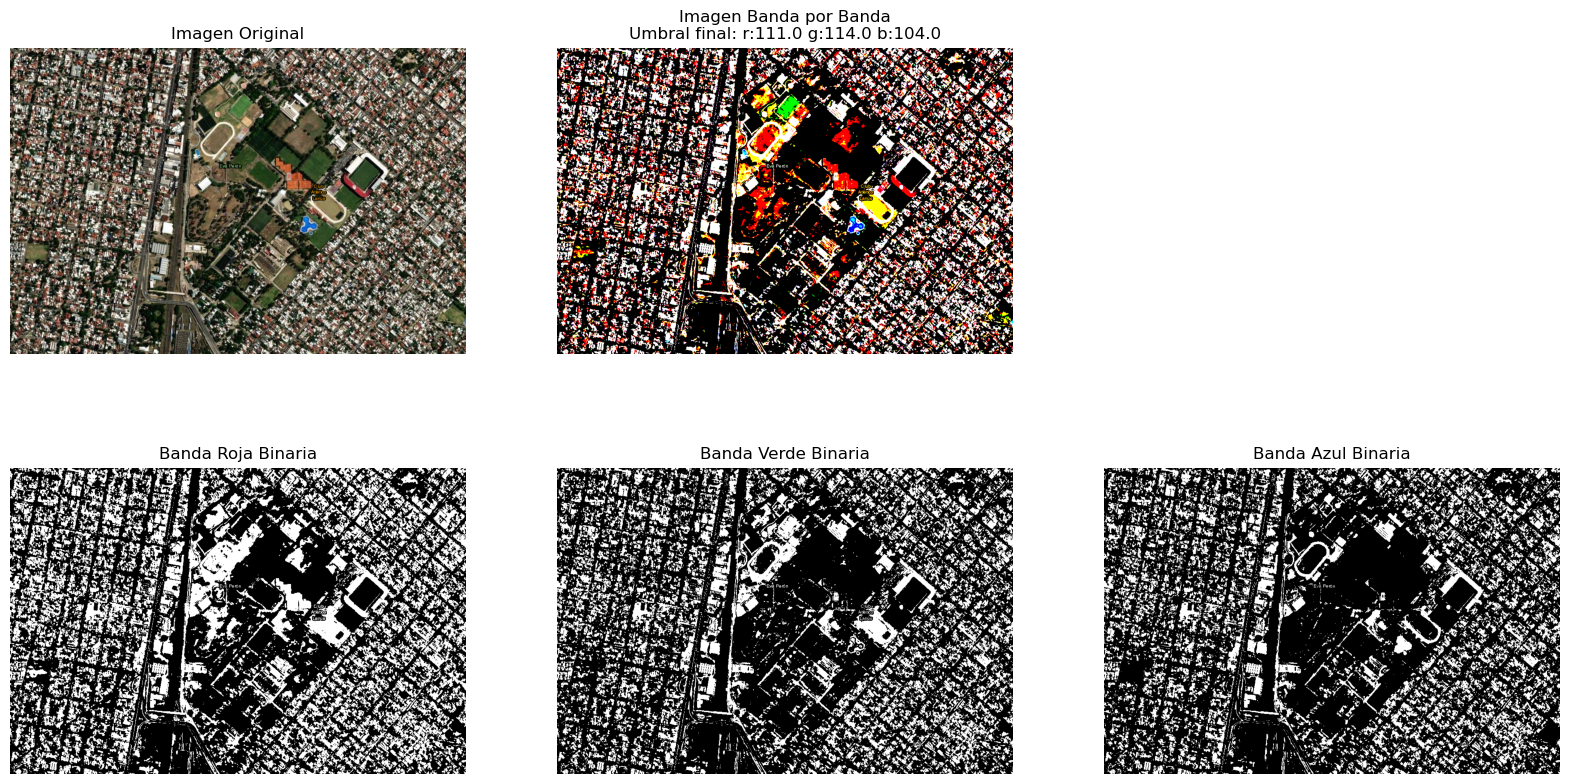

In [31]:
# Aplicar umbralización de Otsu a cada banda de color por separado (Rojo, Verde y Azul)

# Separar las bandas de color
rojo, verde, azul = cv2.split(imagen_rgb)

# Aplicar umbralización de Otsu a cada banda
umbral_valor_r, rojo_binario = cv2.threshold(rojo, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
umbral_valor_g, verde_binario = cv2.threshold(verde, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
umbral_valor_b, azul_binario = cv2.threshold(azul, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Imprimir el valor de umbral calculado por Banda
print(f"Umbral calculado por Global: {umbral_valor_r}")
print(f"Umbral calculado por Global: {umbral_valor_g}")
print(f"Umbral calculado por Global: {umbral_valor_b}")

# Crear la imagen clasificada final combinando las bandas binarias
# Definimos reglas para clasificar en diferentes colores en base a las combinaciones binarias
imagen_banda_banda = np.zeros_like(imagen_rgb)

# Combinaciones de colores a partir de las bandas binarias
imagen_banda_banda[(rojo_binario == 255) & (verde_binario == 0) & (azul_binario == 0)] = [255, 0, 0]      # Rojo
imagen_banda_banda[(rojo_binario == 0) & (verde_binario == 255) & (azul_binario == 0)] = [0, 255, 0]      # Verde
imagen_banda_banda[(rojo_binario == 0) & (verde_binario == 0) & (azul_binario == 255)] = [0, 0, 255]      # Azul
imagen_banda_banda[(rojo_binario == 255) & (verde_binario == 255) & (azul_binario == 0)] = [255, 255, 0]  # Amarillo
imagen_banda_banda[(rojo_binario == 255) & (verde_binario == 0) & (azul_binario == 255)] = [255, 0, 255]  # Magenta
imagen_banda_banda[(rojo_binario == 0) & (verde_binario == 255) & (azul_binario == 255)] = [0, 255, 255]  # Cian
imagen_banda_banda[(rojo_binario == 255) & (verde_binario == 255) & (azul_binario == 255)] = [255, 255, 255]  # Blanco
imagen_banda_banda[(rojo_binario == 0) & (verde_binario == 0) & (azul_binario == 0)] = [0, 0, 0]           # Negro

# Mostrar la imagen original, las bandas binarias y la imagen clasificada final
plt.figure(figsize=(20, 10))

# Mostrar la imagen original en la primera posición (arriba)
plt.subplot(2, 3, 1)
plt.imshow(imagen_rgb)
plt.title('Imagen Original')
plt.axis('off')

# Mostrar la imagen clasificada final en la segunda posición (arriba)
plt.subplot(2, 3, 2)
plt.imshow(imagen_banda_banda)
plt.title(f'Imagen Banda por Banda\nUmbral final: r:{umbral_valor_r} g:{umbral_valor_g} b:{umbral_valor_b}')
plt.axis('off')

# Mostrar las bandas binarias en la fila inferior
plt.subplot(2, 3, 4)
plt.imshow(rojo_binario, cmap='gray')
plt.title('Banda Roja Binaria')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(verde_binario, cmap='gray')
plt.title('Banda Verde Binaria')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(azul_binario, cmap='gray')
plt.title('Banda Azul Binaria')
plt.axis('off')

plt.show()




### Agregar Ruido Gaussiano

**sigma = var ** 0.5**: Calcula la desviación estándar (`sigma`) del ruido gaussiano a partir de la varianza, dado que `sigma` es la raíz cuadrada de `var`.

**gauss = np.random.normal(mean, sigma, imagen.shape)**: Genera una matriz de ruido gaussiano con la misma forma que la imagen, utilizando `np.random.normal`. Los valores de la matriz tienen una media (`mean`) y desviación estándar (`sigma`), simulando un ruido gaussiano.

**imagen_ruido = imagen + gauss * 255**: Agrega el ruido gaussiano a la imagen. Multiplica `gauss` por 255 para que el ruido esté en el mismo rango de intensidad que la imagen (de 0 a 255).

**imagen_ruido = np.clip(imagen_ruido, 0, 255).astype(np.uint8)**: Asegura que los valores de los píxeles estén dentro del rango válido (0 a 255) usando `np.clip`, para evitar que se desborden. Luego, convierte la imagen resultante al tipo `uint8` para que tenga el formato adecuado para ser guardada o visualizada.



Umbral calculado por Global: 119.0
Umbral calculado por Global: 120.0
Umbral calculado por Global: 120.0


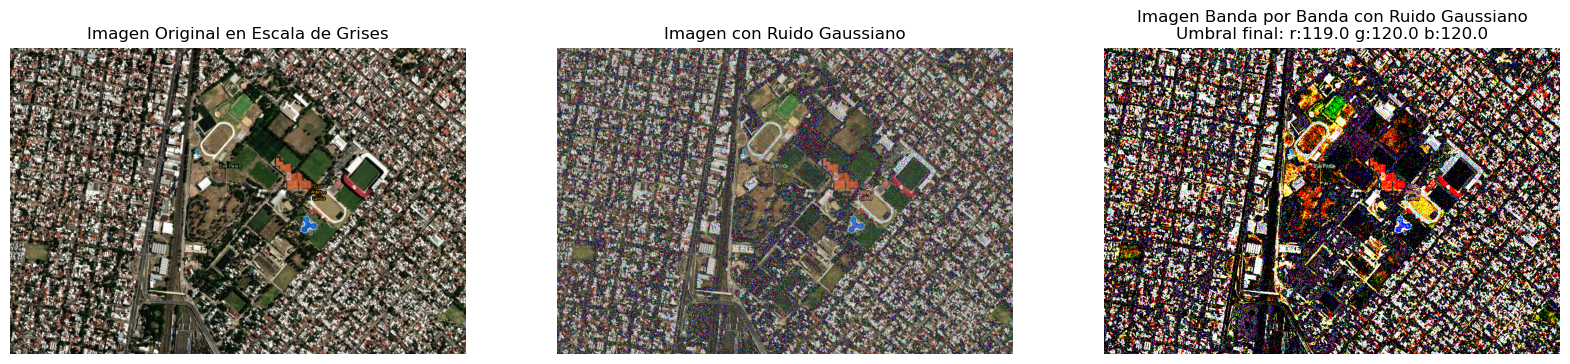

In [32]:
# Función para agregar ruido gaussiano
def add_gaussian_noise(image, mean, stddev, contamination_percentage):
    # Genera ruido gaussiano
    gaussian_noise = np.random.normal(mean, stddev, image.shape)

    # Calcula la máscara de contaminación
    mask = np.random.rand(*image.shape) < (contamination_percentage / 100)

    # Agrega el ruido a la imagen solo en los puntos especificados por la máscara
    noisy_image = np.copy(image)
    noisy_image[mask] = image[mask] + gaussian_noise[mask]

    # Asegura que los valores se mantengan en el rango [0, 255]
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

    return noisy_image

# Aplicar el ruido gaussiano a la imagen en escala de grises
imagen_ruido_gaussiano = add_gaussian_noise(imagen_rgb, 0, 25, 70)

# Separar las bandas de color
rojo, verde, azul = cv2.split(imagen_ruido_gaussiano)

# Aplicar umbralización de Otsu a cada banda
umbral_valor_r_gauss, rojo_binario = cv2.threshold(rojo, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
umbral_valor_g_gauss, verde_binario = cv2.threshold(verde, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
umbral_valor_b_gauss, azul_binario = cv2.threshold(azul, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Imprimir el valor de umbral calculado por Banda
print(f"Umbral calculado por Global: {umbral_valor_r_gauss}")
print(f"Umbral calculado por Global: {umbral_valor_g_gauss}")
print(f"Umbral calculado por Global: {umbral_valor_b_gauss}")

# Crear la imagen clasificada final combinando las bandas binarias
# Definimos reglas para clasificar en diferentes colores en base a las combinaciones binarias
imagen_banda_gaussiana = np.zeros_like(imagen_ruido_gaussiano)

# Combinaciones de colores a partir de las bandas binarias
imagen_banda_gaussiana[(rojo_binario == 255) & (verde_binario == 0) & (azul_binario == 0)] = [255, 0, 0]      # Rojo
imagen_banda_gaussiana[(rojo_binario == 0) & (verde_binario == 255) & (azul_binario == 0)] = [0, 255, 0]      # Verde
imagen_banda_gaussiana[(rojo_binario == 0) & (verde_binario == 0) & (azul_binario == 255)] = [0, 0, 255]      # Azul
imagen_banda_gaussiana[(rojo_binario == 255) & (verde_binario == 255) & (azul_binario == 0)] = [255, 255, 0]  # Amarillo
imagen_banda_gaussiana[(rojo_binario == 255) & (verde_binario == 0) & (azul_binario == 255)] = [255, 0, 255]  # Magenta
imagen_banda_gaussiana[(rojo_binario == 0) & (verde_binario == 255) & (azul_binario == 255)] = [0, 255, 255]  # Cian
imagen_banda_gaussiana[(rojo_binario == 255) & (verde_binario == 255) & (azul_binario == 255)] = [255, 255, 255]  # Blanco
imagen_banda_gaussiana[(rojo_binario == 0) & (verde_binario == 0) & (azul_binario == 0)] = [0, 0, 0]           # Negro


# Mostrar la imagen original, la imagen con ruido exponencial y la imagen umbralizada
plt.figure(figsize=(20, 5))

# Imagen original
plt.subplot(1, 3, 1)
plt.imshow(imagen_rgb)
plt.title('Imagen Original en Escala de Grises')
plt.axis('off')

# Imagen con ruido Gaussiano
plt.subplot(1, 3, 2)
plt.imshow(imagen_ruido_gaussiano)
plt.title('Imagen con Ruido Gaussiano')
plt.axis('off')

# Imagen Clasificada Banda por Banda
plt.subplot(1, 3, 3)
plt.imshow(imagen_banda_gaussiana)
plt.title(f"Imagen Banda por Banda con Ruido Gaussiano\nUmbral final: r:{umbral_valor_r_gauss} g:{umbral_valor_g_gauss} b:{umbral_valor_b_gauss}")
plt.axis("off")

plt.show()


### Agregar Ruido Exponencial Multiplicativo

**expo = np.random.exponential(scale, imagen.shape)**: Genera una matriz de ruido exponencial con la misma forma que la imagen, usando `np.random.exponential`. Los valores en la matriz siguen una distribución exponencial con una escala específica (`scale`).

**imagen_ruido = imagen * expo**: Multiplica la imagen original por el ruido exponencial, afectando los valores de los píxeles y generando una imagen con ruido aplicado.

**imagen_ruido = imagen_ruido / np.max(imagen_ruido) * 255**: Normaliza la imagen ruidosa dividiendo por su valor máximo y multiplicando por 255, para que los valores resultantes estén en el rango de intensidad de 0 a 255.

**imagen_ruido = np.clip(imagen_ruido, 0, 255).astype(np.uint8)**: Asegura que todos los valores de píxeles estén dentro del rango válido (0 a 255) usando `np.clip`, y convierte la imagen resultante al tipo `uint8` para que pueda ser guardada o visualizada correctamente.

Umbral calculado por Global: 100.0
Umbral calculado por Global: 100.0
Umbral calculado por Global: 95.0


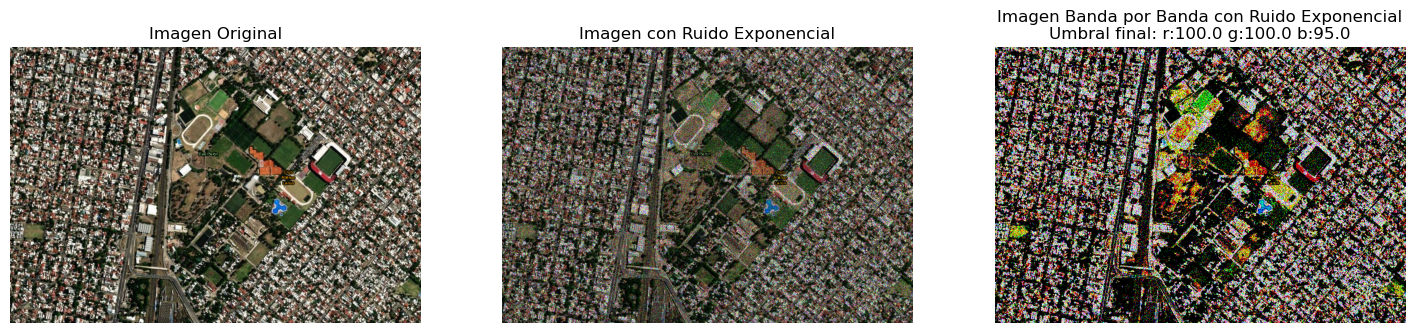

In [33]:
# Función para agregar ruido exponencial multiplicativo
def add_exponential_noise(image, scale, contamination_percentage):
    # Genera ruido exponencial
    exponential_noise = np.random.exponential(scale, image.shape)

    # Calcula la máscara de contaminación
    mask = np.random.rand(*image.shape) < (contamination_percentage / 100)

    # Agrega el ruido a la imagen solo en los puntos especificados por la máscara
    noisy_image = np.copy(image)
    noisy_image[mask] = image[mask] * exponential_noise[mask]

    # Asegura que los valores se mantengan en el rango [0, 255]
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

    return noisy_image

# Aplicar el ruido exponencial a la imagen en escala de grises
imagen_ruido_exponencial = add_exponential_noise(imagen_rgb, 1.0, 50)

# Separar las bandas de color
rojo, verde, azul = cv2.split(imagen_ruido_exponencial)

# Aplicar umbralización de Otsu a cada banda
umbral_valor_r_exp, rojo_binario = cv2.threshold(rojo, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
umbral_valor_g_exp, verde_binario = cv2.threshold(verde, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
umbral_valor_b_exp, azul_binario = cv2.threshold(azul, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Imprimir el valor de umbral calculado por Banda
print(f"Umbral calculado por Global: {umbral_valor_r_exp}")
print(f"Umbral calculado por Global: {umbral_valor_g_exp}")
print(f"Umbral calculado por Global: {umbral_valor_b_exp}")

# Crear la imagen clasificada final combinando las bandas binarias
# Definimos reglas para clasificar en diferentes colores en base a las combinaciones binarias
imagen_banda_exponencial = np.zeros_like(imagen_ruido_exponencial)

# Combinaciones de colores a partir de las bandas binarias
imagen_banda_exponencial[(rojo_binario == 255) & (verde_binario == 0) & (azul_binario == 0)] = [255, 0, 0]      # Rojo
imagen_banda_exponencial[(rojo_binario == 0) & (verde_binario == 255) & (azul_binario == 0)] = [0, 255, 0]      # Verde
imagen_banda_exponencial[(rojo_binario == 0) & (verde_binario == 0) & (azul_binario == 255)] = [0, 0, 255]      # Azul
imagen_banda_exponencial[(rojo_binario == 255) & (verde_binario == 255) & (azul_binario == 0)] = [255, 255, 0]  # Amarillo
imagen_banda_exponencial[(rojo_binario == 255) & (verde_binario == 0) & (azul_binario == 255)] = [255, 0, 255]  # Magenta
imagen_banda_exponencial[(rojo_binario == 0) & (verde_binario == 255) & (azul_binario == 255)] = [0, 255, 255]  # Cian
imagen_banda_exponencial[(rojo_binario == 255) & (verde_binario == 255) & (azul_binario == 255)] = [255, 255, 255]  # Blanco
imagen_banda_exponencial[(rojo_binario == 0) & (verde_binario == 0) & (azul_binario == 0)] = [0, 0, 0]           # Negro



# Mostrar la imagen original, la imagen con ruido exponencial y la imagen umbralizada
plt.figure(figsize=(18, 5))

# Imagen original
plt.subplot(1, 3, 1)
plt.imshow(imagen_rgb, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

# Imagen con ruido Exponencial
plt.subplot(1, 3, 2)
plt.imshow(imagen_ruido_exponencial, cmap='gray')
plt.title('Imagen con Ruido Exponencial')
plt.axis('off')

# Imagen Clasificada Banda por Banda
plt.subplot(1, 3, 3)
plt.imshow(imagen_banda_exponencial, cmap='gray')
plt.title(f"Imagen Banda por Banda con Ruido Exponencial\nUmbral final: r:{umbral_valor_r_exp} g:{umbral_valor_g_exp} b:{umbral_valor_b_exp}")
plt.axis("off")

plt.show()

### Agregar Ruido de Sal y Pimienta

**num_salt = int(np.ceil(prob * imagen.size * 0.5))**: Calcula el número de píxeles que serán alterados a "sal" (blancos). `imagen.size` es el número total de píxeles en la imagen, y el `0.5` indica que se aplicará la mitad de los cambios para "sal".

**num_pepper = int(np.ceil(prob * imagen.size * 0.5))**: Similar a `num_salt`, calcula el número de píxeles que serán alterados a "pimienta" (negros), aplicando la otra mitad de los cambios.

**salt_coords = (np.random.randint(0, imagen.shape[0], num_salt), np.random.randint(0, imagen.shape[1], num_salt))**: Genera coordenadas aleatorias para los puntos de "sal" en la imagen. `np.random.randint` selecciona valores de fila y columna aleatorios dentro del tamaño de la imagen para colocar los puntos blancos.

**imagen_ruido[salt_coords] = 255**: Asigna el valor 255 (blanco) a los píxeles en las coordenadas seleccionadas para "sal", agregando puntos blancos a la imagen.

**pepper_coords = (np.random.randint(0, imagen.shape[0], num_pepper), np.random.randint(0, imagen.shape[1], num_pepper))**: Genera coordenadas aleatorias para los puntos de "pimienta" en la imagen de manera similar a los puntos de "sal".

**imagen_ruido[pepper_coords] = 0**: Asigna el valor 0 (negro) a los píxeles en las coordenadas seleccionadas para "pimienta", agregando puntos negros a la imagen.



Umbral calculado por Global: 128.0
Umbral calculado por Global: 134.0
Umbral calculado por Global: 129.0


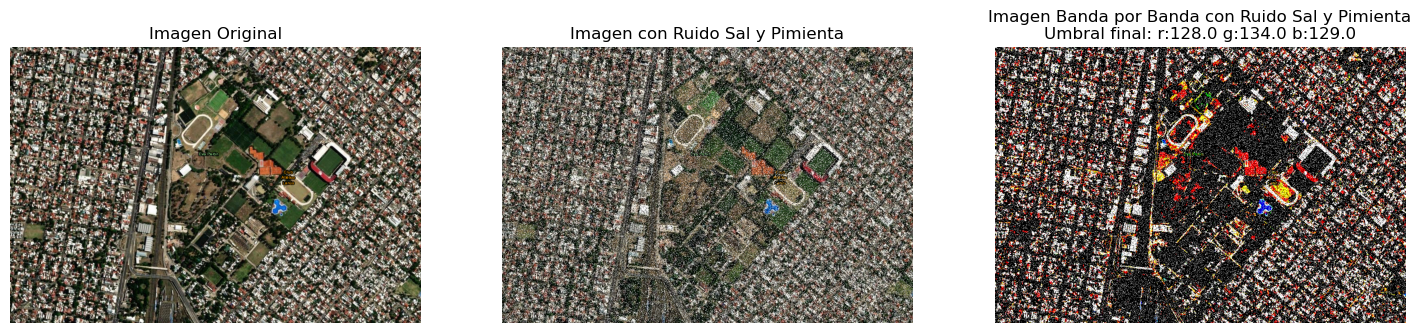

In [34]:
# Función para agregar ruido sal y pimienta
def agregar_ruido_sal_pimienta(imagen, prob=0.1):
    imagen_ruido = np.copy(imagen)
    num_salt = int(np.ceil(prob * imagen.size * 0.5))
    num_pepper = int(np.ceil(prob * imagen.size * 0.5))

    # Coordenadas de sal
    salt_coords = (np.random.randint(0, imagen.shape[0], num_salt),
                   np.random.randint(0, imagen.shape[1], num_salt))
    imagen_ruido[salt_coords] = 255  # Blanco para 'sal'

    # Coordenadas de pimienta
    pepper_coords = (np.random.randint(0, imagen.shape[0], num_pepper),
                     np.random.randint(0, imagen.shape[1], num_pepper))
    imagen_ruido[pepper_coords] = 0  # Negro para 'pimienta'

    return imagen_ruido

# Aplicar el ruido sal y pimienta a la imagen en escala de grises
imagen_ruido_sal_pimienta = agregar_ruido_sal_pimienta(imagen_rgb)

# Separar las bandas de color
rojo, verde, azul = cv2.split(imagen_ruido_sal_pimienta)

# Aplicar umbralización de Otsu a cada banda
umbral_valor_r_sp, rojo_binario = cv2.threshold(rojo, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
umbral_valor_g_sp, verde_binario = cv2.threshold(verde, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
umbral_valor_b_sp, azul_binario = cv2.threshold(azul, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Imprimir el valor de umbral calculado por Banda
print(f"Umbral calculado por Global: {umbral_valor_r_sp}")
print(f"Umbral calculado por Global: {umbral_valor_g_sp}")
print(f"Umbral calculado por Global: {umbral_valor_b_sp}")

# Crear la imagen clasificada final combinando las bandas binarias
# Definimos reglas para clasificar en diferentes colores en base a las combinaciones binarias
imagen_banda_sal_pimienta = np.zeros_like(imagen_ruido_sal_pimienta)

# Combinaciones de colores a partir de las bandas binarias
imagen_banda_sal_pimienta[(rojo_binario == 255) & (verde_binario == 0) & (azul_binario == 0)] = [255, 0, 0]      # Rojo
imagen_banda_sal_pimienta[(rojo_binario == 0) & (verde_binario == 255) & (azul_binario == 0)] = [0, 255, 0]      # Verde
imagen_banda_sal_pimienta[(rojo_binario == 0) & (verde_binario == 0) & (azul_binario == 255)] = [0, 0, 255]      # Azul
imagen_banda_sal_pimienta[(rojo_binario == 255) & (verde_binario == 255) & (azul_binario == 0)] = [255, 255, 0]  # Amarillo
imagen_banda_sal_pimienta[(rojo_binario == 255) & (verde_binario == 0) & (azul_binario == 255)] = [255, 0, 255]  # Magenta
imagen_banda_sal_pimienta[(rojo_binario == 0) & (verde_binario == 255) & (azul_binario == 255)] = [0, 255, 255]  # Cian
imagen_banda_sal_pimienta[(rojo_binario == 255) & (verde_binario == 255) & (azul_binario == 255)] = [255, 255, 255]  # Blanco
imagen_banda_sal_pimienta[(rojo_binario == 0) & (verde_binario == 0) & (azul_binario == 0)] = [0, 0, 0]           # Negro


# Mostrar la imagen original, la imagen con ruido exponencial y la imagen umbralizada
plt.figure(figsize=(18, 5))

# Imagen original
plt.subplot(1, 3, 1)
plt.imshow(imagen_rgb)
plt.title('Imagen Original')
plt.axis('off')

# Imagen con ruido Sal y Pimienta
plt.subplot(1, 3, 2)
plt.imshow(imagen_ruido_sal_pimienta, cmap='gray')
plt.title('Imagen con Ruido Sal y Pimienta')
plt.axis('off')

# Imagen Banda por Banda con Ruido Sal y Pimienta
plt.subplot(1, 3, 3)
plt.imshow(imagen_banda_sal_pimienta, cmap='gray')
plt.title(f"Imagen Banda por Banda con Ruido Sal y Pimienta\nUmbral final: r:{umbral_valor_r_sp} g:{umbral_valor_g_sp} b:{umbral_valor_b_sp}")
plt.axis("off")

plt.show()

### Comparación de todos los resultados

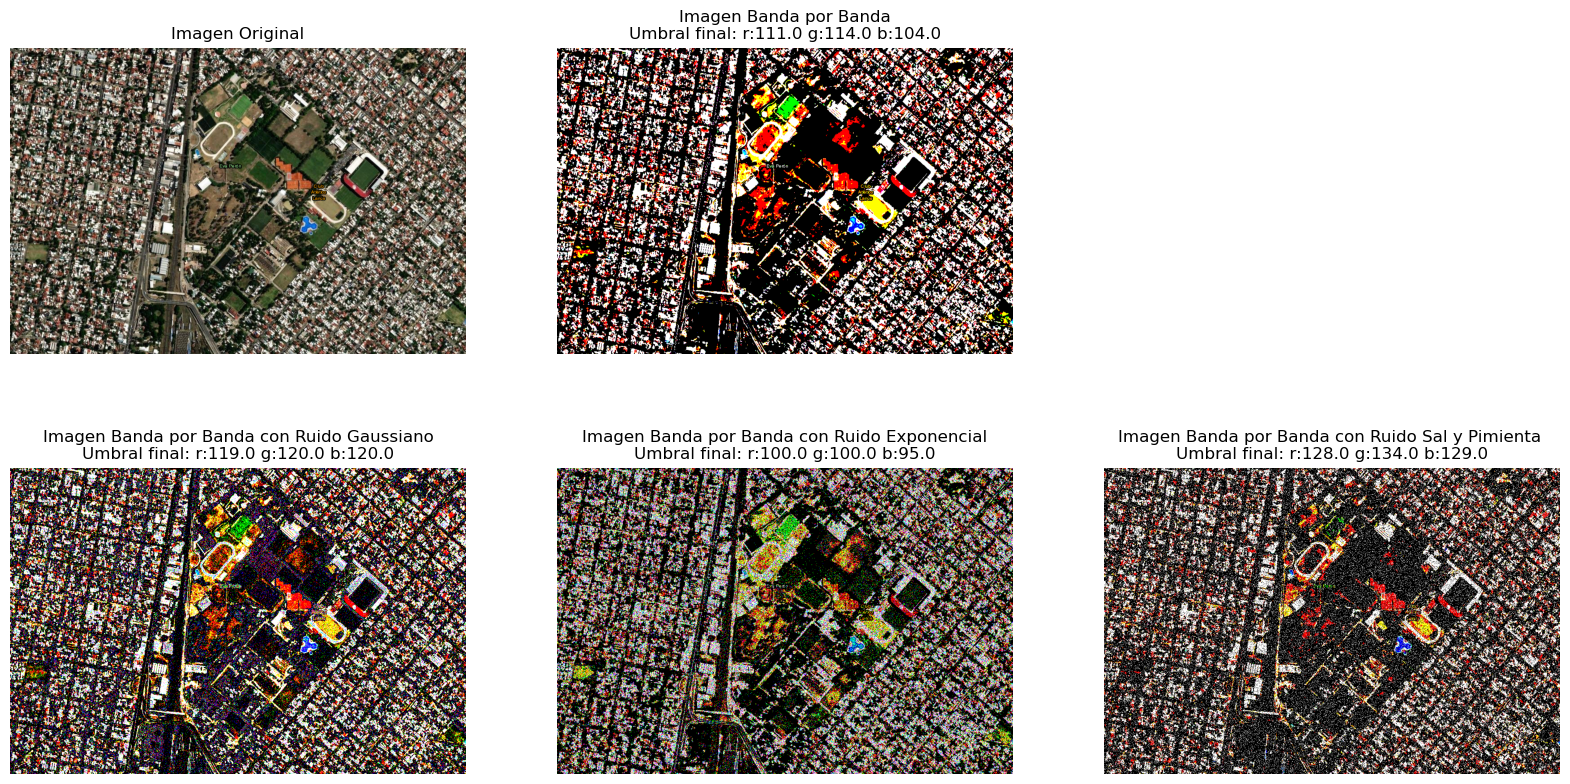

In [35]:
# Mostrar la imagen original, las bandas binarias y la imagen clasificada final
plt.figure(figsize=(20, 10))

# Mostrar la imagen original en la primera posición (arriba)
plt.subplot(2, 3, 1)
plt.imshow(imagen_rgb)
plt.title('Imagen Original')
plt.axis('off')

# Mostrar la imagen clasificada final en la segunda posición (arriba)
plt.subplot(2, 3, 2)
plt.imshow(imagen_banda_banda)
plt.title(f'Imagen Banda por Banda\nUmbral final: r:{umbral_valor_r} g:{umbral_valor_g} b:{umbral_valor_b}')
plt.axis('off')

# Mostrar las bandas binarias en la fila inferior
plt.subplot(2, 3, 4)
plt.imshow(imagen_banda_gaussiana)
plt.title(f'Imagen Banda por Banda con Ruido Gaussiano\nUmbral final: r:{umbral_valor_r_gauss} g:{umbral_valor_g_gauss} b:{umbral_valor_b_gauss}')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(imagen_banda_exponencial)
plt.title(f'Imagen Banda por Banda con Ruido Exponencial\nUmbral final: r:{umbral_valor_r_exp} g:{umbral_valor_g_exp} b:{umbral_valor_b_exp}')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(imagen_banda_sal_pimienta)
plt.title(f'Imagen Banda por Banda con Ruido Sal y Pimienta \nUmbral final: r:{umbral_valor_r_sp} g:{umbral_valor_g_sp} b:{umbral_valor_b_sp}')
plt.axis('off')

plt.show()